##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini Flash Introduction

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Gemini_Flash_Introduction.ipynb"><img src="../images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

The Gemini 1.5 Flash is a new model from Gemini ecosystem providing better quality and lower latency for existing Gemini 1.0 Pro developers and users.

It simplifies your tests and adoption due to feature parity with the currently available Gemini models.

In this notebook you will experiment with different scenarios (including text, chat and multimodal examples) where the only change required is changing the model you want to interact with - all the code is simply the same.

## Installing the latest version of the Gemini SDK

In [ ]:
!pip install -q -U "google-generativeai>=0.7.2" # Install the Python SDK

## Import the Gemini python SDK

In [ ]:
import google.generativeai as genai

## Set up your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see the [Authentication](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Authentication.ipynb) quickstart for an example.

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Working with text scenarios

In the first scenario of this notebook, you will work with text only scenarios. You will send direct requests, in text format, to the Gemini API and handle the results. It will include the understanding the information for each model (including input and output limits) and working with mechanisms to count the tokens of your request.

First pick which model version you want to experiment with selecting on the listbox below - The available models are:

- `models/gemini-1.5-flash`
- `models/gemini-1.5-pro`
- `models/gemini-1.0-pro`

In [2]:
version = 'models/gemini-1.5-flash' # @param ["models/gemini-1.5-flash", "models/gemini-1.5-pro", "models/gemini-1.0-pro"]
model = genai.GenerativeModel(version)

Using `model.get_model()` method, you can explore details about the model, like `input_token_limit` and `output_token_limit`:

In [3]:
model_info = genai.get_model(version)
print(f'{version} - input limit: {model_info.input_token_limit}, output limit: {model_info.output_token_limit}')

models/gemini-1.5-flash - input limit: 1048576, output limit: 8192


You can also count the tokens of your input using the `model.count_tokens()` method:

In [4]:
prompt = "What is artificial intelligence?"
model.count_tokens(prompt)

total_tokens: 5

Then you can send your request prompt to Gemini API - Does not matter which model version you chose, the same request code is going to be used here:

In [5]:
response = model.generate_content(prompt)
print(response.text)

## What is Artificial Intelligence?

Artificial intelligence (AI) is a branch of computer science that deals with creating intelligent agents, which are systems that can reason, learn, and act autonomously. In simpler terms, AI aims to make machines behave like humans, exhibiting characteristics like:

* **Learning:** Acquiring new information and skills through experience.
* **Reasoning:** Applying logic and knowledge to solve problems and make decisions.
* **Problem-solving:** Finding solutions to complex challenges.
* **Perception:** Understanding and interpreting the world through sensory data.
* **Natural Language Processing:** Understanding and generating human language.

**Types of AI:**

* **Narrow or Weak AI:** Designed to perform specific tasks, like playing chess or recommending movies. Examples include Siri, Alexa, and self-driving cars.
* **General or Strong AI:** Aims to achieve human-level intelligence, capable of performing any intellectual task that a human can. This i

## Working with chat scenarios

The next experimentation is working with chats. Again, the first action is to pick which model you want to play with. As for the text example, you can pick one of the above:
- `models/gemini-1.5-flash`
- `models/gemini-1.5-pro`
- `models/gemini-1.0-pro`

In [6]:
version = 'models/gemini-1.5-flash' # @param ["models/gemini-1.5-flash", "models/gemini-1.5-pro", "models/gemini-1.0-pro"]
model = genai.GenerativeModel(version)
chat = model.start_chat(history=[])

Using `model.get_model()` method, you can explore details about the model, like `input_token_limit` and `output_token_limit`:

In [7]:
model_info = genai.get_model(version)
print(f'{version} - input limit: {model_info.input_token_limit}, output limit: {model_info.output_token_limit}')

models/gemini-1.5-flash - input limit: 1048576, output limit: 8192


You can also count the tokens of your experiment using the `model.count_tokens()` method:

In [8]:
prompt = "How can I start learning artificial intelligence?"
model.count_tokens(prompt)

total_tokens: 8

Then you can send your request prompt to the Gemini API - Does not matter which model version you chose, the same request code is going to be used here:

In [9]:
response = chat.send_message("How can I start learning artificial intelligence?")
print(response.text)

##  Starting your AI journey: A roadmap for beginners 

**1. Foundational Knowledge:**

* **Mathematics:**  Understand fundamental concepts like linear algebra, calculus, probability, and statistics.  Khan Academy, Coursera, and edX offer excellent free resources.
* **Programming:** Python is the go-to language for AI. Learn the basics of coding, data structures, and algorithms. Resources like Codecademy, freeCodeCamp, and Google's Python Class are great starting points.
* **Data Science Fundamentals:**  Get familiar with data manipulation, cleaning, visualization, and analysis using libraries like Pandas, NumPy, and Matplotlib in Python.

**2. Hands-on Practice:**

* **Online Courses:** Platforms like Coursera, edX, Udacity, and Udemy offer structured AI courses, from beginner to advanced levels. Some popular choices include:
    * **Machine Learning:** Andrew Ng's Machine Learning course on Coursera
    * **Deep Learning:** Deep Learning Specialization by Andrew Ng on Coursera
    * 

The same way you can perform a tokens counting for your prompts, you can use it against your chat history too, using the same `model.count_tokens()` method:

In [10]:
model.count_tokens(chat.history)

total_tokens: 664

## Working with multimodal scenarios

Then finally you can experiment with a multimodal experiment - or, in other words, sending in the same request prompt different data modalities (like text and images together).

You must first pick which model version you want to experiment with selecting on the listbox below - The available models are:

- `models/gemini-1.5-flash`
- `models/gemini-1.5-pro`


In [11]:
version = 'models/gemini-1.5-flash' # @param ["models/gemini-1.5-flash", "models/gemini-1.5-pro"]
model = genai.GenerativeModel(version)

Using `model.get_model()` method, you can explore details about the model, like `input_token_limit` and `output_token_limit`:

In [12]:
model_info = genai.get_model(version)
print(f'{version} - input limit: {model_info.input_token_limit}, output limit: {model_info.output_token_limit}')

models/gemini-1.5-flash - input limit: 1048576, output limit: 8192


Now you will pick a test image to be used on your multimodal prompt. Here you will use a sample croissant image:

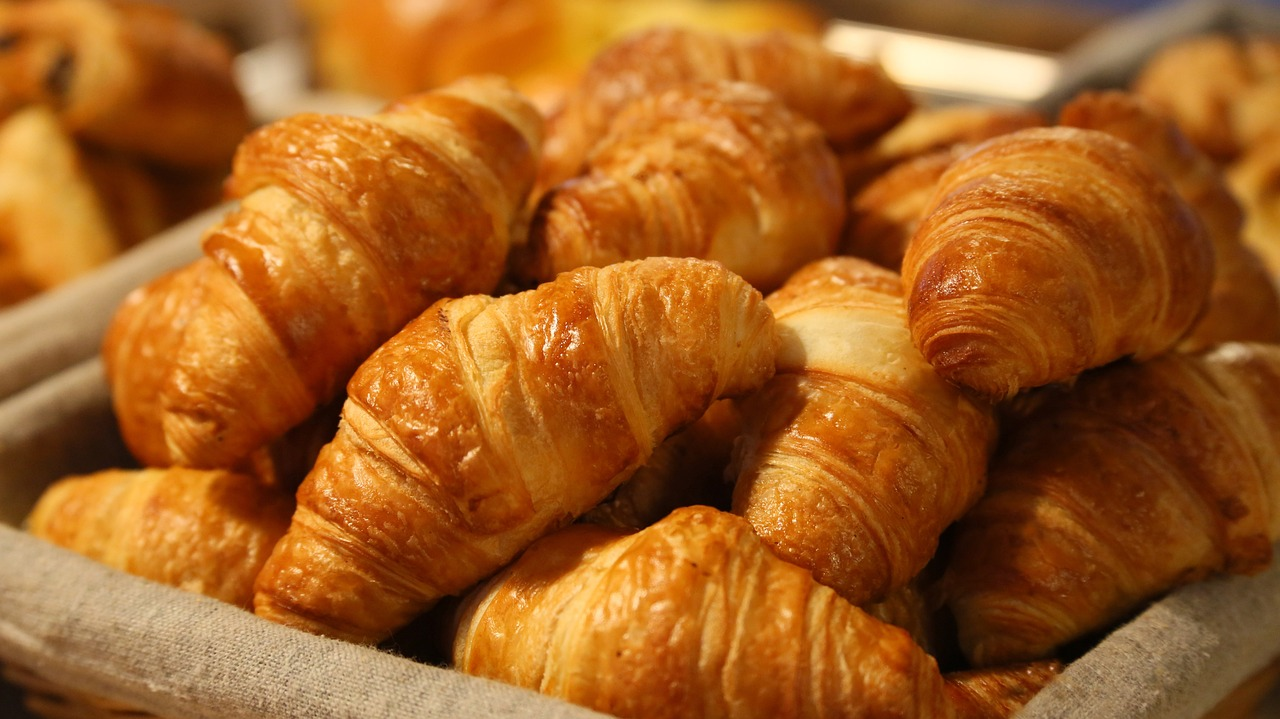

In [13]:
import PIL
from IPython.display import display, Image

!curl -s -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/croissant.jpg"
img = PIL.Image.open('image.jpg')
display(Image('image.jpg', width=300))

As you did for the text and chat prompts, you can perform a tokens counting for your image as well. Here you will show first the image resolution (using `img.size`) and then the amount of tokens that represent the image, using `model.cout_tokens()` method:

In [14]:
print(img.size)
print(model.count_tokens(img))

(1280, 719)
total_tokens: 258



Now it is time to define the text prompt to be sent together with your test image - in this case, you will send a request to extract some information from the image, like what is in the image, which country the item in the image is related and what is the best pairing for the item.

In [15]:
prompt = """
Describe this image, including which country is famous for having this food and what is the best pairing for it.
"""

In [16]:
response = model.generate_content([prompt, img])
print(response.text)

The image shows a basket full of croissants. Croissants are a type of pastry that originated in France. They are made from a rich, buttery dough that is layered and folded multiple times. Croissants are typically served for breakfast or as a snack.

The best pairing for a croissant is a cup of strong black coffee. The bitterness of the coffee complements the sweetness of the croissant, and the two flavors create a perfect balance. 



## Learning more

* To learn how use a model for prompting, see the [Prompting](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb) quickstart.

* [count_tokens](https://ai.google.dev/api/python/google/generativeai/GenerativeModel#count_tokens) Python API reference and [Count Tokens](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Counting_Tokens.ipynb) quickstart.

* For more information on models, visit the [Gemini models](https://ai.google.dev/models/gemini) documentation.